<a href="https://colab.research.google.com/github/wahyukusuma/MobileAccelerometer/blob/master/Simple_Dynamic_Activity_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
#
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.plotting import plot_decision_regions
%matplotlib inline

In [0]:
from sklearn.utils import shuffle
train = pd.read_csv("drive/My Drive/1HumanActivity/HAPT/train.csv", index_col ="Activity")
test = pd.read_csv("drive/My Drive/1HumanActivity/HAPT/test.csv", index_col ="Activity")
train = shuffle(train)
test = shuffle(test)
#display(train)

# Print Activity ROW

In [4]:
train.index.unique()

Index(['WALKING_UPSTAIRS', 'STANDING', 'LAYING', 'SITTING',
       'WALKING_DOWNSTAIRS', 'WALKING'],
      dtype='object', name='Activity')

# Select Activity

In [0]:
StaticTrain = train.loc[['WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'WALKING']]
StaticTest = test.loc[['WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'WALKING']]

In [6]:
#display(StaticTrain)
StaticTrain.index.unique()

Index(['WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'WALKING'], dtype='object', name='Activity')

In [0]:
subject_training_data = StaticTrain['subject']
subject_testing_data = StaticTest['subject']
StaticTrain = StaticTrain.drop(['subject'], axis=1)
StaticTest = StaticTest.drop(['subject'], axis=1)

training_labels = StaticTrain.index
testing_labels = StaticTest.index
StaticTrain.reset_index(drop=True, inplace=True)
StaticTest.reset_index(drop=True, inplace=True)

In [8]:
print ("Training data consists of {} instances of data with {} total features".format(StaticTrain.shape[0], StaticTrain.shape[1]))
print ("Training data includes value counts of\n",training_labels.value_counts())
print ("\n")
print ("Testing data consists of {} instances of data".format(test.shape[0]))
print ("Testing data includes value counts of\n",testing_labels.value_counts())

Training data consists of 3285 instances of data with 561 total features
Training data includes value counts of
 WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64


Testing data consists of 2947 instances of data
Testing data includes value counts of
 WALKING               496
WALKING_UPSTAIRS      471
WALKING_DOWNSTAIRS    420
Name: Activity, dtype: int64


In [9]:
numerics = ['int16','int32','int64','float16','float32','float64']
numerical_vars = list(StaticTrain.select_dtypes(include=numerics).columns)
X_train = StaticTrain#[numerical_vars]
X_train.shape
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-energy(),fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.301996,0.005551,-0.047761,-0.086115,-0.063515,0.050842,-0.188303,0.007074,0.063307,0.239008,-0.067162,0.025084,0.222351,0.226273,0.448328,0.025608,-0.581258,-0.829191,-0.500488,-0.458950,-0.131039,-0.069887,0.414726,0.304184,0.066303,-0.595870,0.567695,-0.393447,0.230256,-0.129350,0.028331,0.243790,-0.062265,-0.280692,0.036799,0.051003,0.122826,-0.275841,-0.146922,0.008337,...,-0.723890,-0.326829,0.385208,-0.904762,0.105388,-0.049484,-0.347700,-0.341300,-0.057301,-0.112325,-0.030405,-0.734162,-0.341300,-0.559433,-0.573287,0.464074,-0.846154,-0.405192,0.016110,-0.329511,-0.697651,-0.775263,-0.716170,-0.801349,-0.968533,-0.697651,-0.960238,-0.622395,0.272127,-0.492063,0.250825,-0.569259,-0.805243,-0.048545,0.682296,-0.977632,0.067132,-0.764855,0.260605,0.021414
1,0.203085,-0.027589,-0.126276,0.039416,0.170278,-0.353439,-0.044945,0.155928,-0.369846,0.118625,0.129518,-0.287110,-0.155569,0.020114,0.524565,0.034066,-0.457978,-0.735636,-0.808846,-0.204995,-0.028110,-0.439456,0.418478,0.211757,0.040436,-0.445331,0.179453,0.097801,0.120051,-0.166776,0.048892,0.092365,0.135033,-0.277902,0.140940,0.002059,0.004664,-0.479195,-0.276081,0.288305,...,-0.806546,-0.356548,0.260632,-0.904762,0.039735,-0.030164,-0.364642,-0.462817,-0.298562,-0.292839,-0.345565,-0.791488,-0.462817,-0.743592,-0.694350,0.360713,-1.000000,-0.324360,-0.210000,-0.580191,-0.691627,-0.722483,-0.690218,-0.745736,-0.956623,-0.691627,-0.952883,-0.736048,0.247995,-0.904762,-0.053105,-0.290903,-0.650857,0.441380,-0.714588,0.223927,-0.567171,-0.575117,0.354336,0.160300
2,0.290680,-0.008456,-0.112453,-0.109813,0.050054,-0.429982,-0.245159,-0.033575,-0.419161,0.468660,0.035964,-0.391409,0.003387,-0.210429,0.445557,-0.146769,-0.602673,-0.786770,-0.850789,-0.518504,-0.353242,-0.405327,0.616689,0.275593,0.176406,-0.482529,0.332789,-0.034470,-0.016572,-0.169484,0.109817,0.209423,-0.166325,-0.357842,0.412383,-0.547556,0.364378,-0.526415,-0.126435,0.142079,...,-0.653277,-0.124497,0.512649,-0.904762,0.033706,-0.298306,-0.669465,-0.553900,-0.631729,-0.548916,-0.7

In [10]:
numerical_vars = list(StaticTest.select_dtypes(include=numerics).columns)
X_test = StaticTest#[numerical_vars]
X_test.shape
X_test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-energy(),fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.229200,0.002363,-0.049377,-0.398390,-0.288957,-0.281767,-0.459946,-0.280455,-0.221239,-0.125299,-0.137858,-0.296766,0.471159,0.349295,0.613026,-0.284740,-0.817225,-0.900722,-0.760745,-0.587970,-0.398900,-0.170849,0.177291,0.246110,-0.056562,-0.381952,0.142364,-0.002204,0.204222,-0.193265,0.040786,0.072634,0.235526,-0.466592,0.259327,-0.141550,0.088782,-0.465034,0.147449,0.029004,...,-0.939818,-0.726959,-0.031202,-0.904762,0.078961,-0.152937,-0.534977,-0.712248,-0.533153,-0.601497,-0.535038,-0.959676,-0.712248,-0.897084,-0.760417,0.232424,-0.846154,-0.496913,0.104701,-0.285702,-0.871799,-0.890018,-0.868133,-0.912257,-0.901998,-0.871799,-0.991935,-0.844420,-0.120726,-0.936508,-0.020604,-0.443292,-0.785254,0.309983,0.809913,-0.930982,0.689040,-0.688943,0.305765,-0.038357
1,0.253423,-0.034023,-0.089549,-0.173450,0.046471,-0.402548,-0.283879,-0.005549,-0.401135,0.017229,-0.081174,-0.305884,0.027481,-0.000711,0.597912,-0.160615,-0.657106,-0.787831,-0.836008,-0.519513,-0.230434,-0.503319,0.599037,0.242708,0.031117,-0.487420,0.358610,-0.196977,0.202011,-0.311187,0.372536,-0.158263,0.174128,-0.076029,0.054985,-0.155138,0.234036,-0.339272,0.155851,-0.080759,...,-0.789085,-0.277516,0.373627,-0.746032,0.092052,-0.458903,-0.760038,-0.530487,-0.471231,-0.427049,-0.494233,-0.817335,-0.530487,-0.839913,-0.588300,0.467989,-0.948718,-0.219182,-0.255876,-0.580775,-0.734446,-0.813195,-0.761924,-0.869519,-0.667202,-0.734446,-0.970201,-0.752901,0.109877,-0.841270,0.273885,-0.640305,-0.932392,0.133976,0.500867,0.910345,-0.815295,-0.748509,0.267931,-0.020123
2,0.164539,-0.036406,-0.163620,-0.539957,-0.300681,-0.445174,-0.557462,-0.258418,-0.449216,-0.474090,-0.207849,-0.473240,0.359084,0.418378,0.458494,-0.390631,-0.890357,-0.903918,-0.853934,-0.587140,-0.293239,-0.476604,0.300527,0.079847,0.064485,-0.160784,0.034777,0.268853,-0.029476,-0.045977,-0.210222,0.612920,-0.319599,-0.052005,-0.039912,0.380537,-0.267358,-0.135927,0.162933,0.120874,...,-0.897741,-0.578399,0.014728,-0.873016,0.213624,-0.173813,-0.500380,-0.462188,-0.5132

In [0]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

le = LabelEncoder()
le = le.fit(['WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'WALKING'])
#le = le.fit(["1", "2", "3", "4", "5", "6"])
enc_training_labels = le.transform(training_labels)
enc_testing_labels = le.transform(testing_labels)

In [0]:
from sklearn.model_selection import cross_val_score

In [0]:
lr = LogisticRegression(max_iter = 1000)

In [0]:
def evaluateclf(clf):
    scores = cross_val_score(clf, StaticTrain, enc_training_labels)
    avg = scores.mean()
    return "performances: {}, \nAverage: {}".format(scores, avg)

In [16]:
print ("Logistic Regression {}".format(evaluateclf(lr)))

Logistic Regression performances: [1.         0.99543379 1.         0.99543379 1.        ], 
Average: 0.9981735159817351


In [0]:
lr.fit(StaticTrain,enc_training_labels)
y_pred=lr.predict(StaticTest)

In [18]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(enc_testing_labels, y_pred)
cnf_matrix

array([[493,   3,   0],
       [  3, 406,  11],
       [ 23,   2, 446]])

In [0]:
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

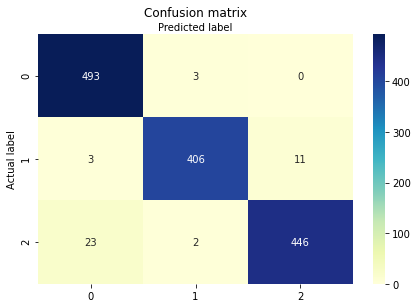

In [20]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [21]:
print("Accuracy:",metrics.accuracy_score(enc_testing_labels, y_pred))
print("Precision:",metrics.precision_score(enc_testing_labels, y_pred, average='micro'))
print("Recall:",metrics.recall_score(enc_testing_labels, y_pred, average='macro'))

Accuracy: 0.969718817591925
Precision: 0.969718817591925
Recall: 0.9691799077688742
